In [2]:
import keras as keras
import tensorflow as tf
import matplotlib

# from matplotlib import style
import pandas as pd
import numpy as np

import csv

Using TensorFlow backend.


In [3]:
# keras data example
# 98u7
# mnist = tf.keras.datasets.mnist
# (x_train, y_train),(x_test, y_test) = mnist.load_data()

# x_train = tf.keras.utils.normalize(x_train, axis=1)
# test = tf.keras.utils.normalize(x_test, axis=1)
# plt.imshow(x_train[0],cmap=plt.cm.binary)
# plt.show()

In [4]:
txt_file = "2017-2018season.txt"
season_arrays = []
# # turns data into a 2d array called season_arrays which will be the
# # raw data that we are trying to process. 
with open(txt_file, newline='') as season_csv:
    reader = csv.reader(season_csv, delimiter=' ', quotechar='|')
    for rows in reader:
        for item in rows:
            row = item.split(',')
            #numerating away/home
            if row[3] == 'Away':
                row[3] = 0
            elif row[3] == 'Home':
                row[3] = 1
        if row in season_arrays:
            continue
        else:
            season_arrays.append(row)

# categories of season_arrays
categories = ['game_date', 'home_team', 'enemy_team', 'home_away', 'win', 'loss', 'over_time', 'points', 'goals_for',
              'goals_against', 'shots_for', 'shots_against', 'power_play_goals_for', 'power_play_opportunities', 
              'power_play_percent','power_play_goals_against', 'penalty_kill_percent', 'faceoff_wins', 'faceoff_losses', 
              'faceoff_win_pct']

#items from each line of season_arrays for append new array
# added a 'win' to see how it depends of 'PPvsPK' and 'PPGvsPPGA' on plot
nessesary_items = ['home_team', 'win', 'over_time', 'goals_for', 'shots_for', 'goals_against', 'shots_against', 'power_play_goals_for',
                   'power_play_opportunities', 'power_play_percent', 'power_play_goals_against', 'penalty_kill_percent',
                   'faceoff_win_pct']
def num(s):
    try:
        return int(s)
    except ValueError:
        return float(s)

# takes two arrays and differentiates each value at each index to form new list 
def differentiate(list1, list2):
    new = []
    if len(list1) == len(list2):
        if (isinstance(num(list1[0]), float)):
            for i,j in enumerate(list1):
                new.append(round(float(list2[i]) - float(j), 3))
        else:
            for i,j in enumerate(list1):
                new.append(num(list2[i]) - num(j))
    else:
        print(f"------List lengths do not match-----\n List 1 length: {len(list1)} \n list 2 length: {len(list2)}")
    return new

#appending new array, later have to add  , 'PPvsPK', 'PPGvsPPGA', 'faceoff_WvsL'
new_season_array = []
for i, e in enumerate(season_arrays):
    for j, e in enumerate(season_arrays):
        if season_arrays[i][0] == season_arrays[j][0] and season_arrays[i][1]==season_arrays[j][2]:
            string_one = []
            string_two = []
            for elem in nessesary_items:
                string_one.append(season_arrays[i][categories.index(elem)])
                string_two.append(season_arrays[j][categories.index(elem)])
            new_season_array.append(string_one+string_two)            
#heads for dataframe            
df_names = ['home_team', 'home_win', 'home_overtime', 'home_goals_for', 'home_shots_for', 'home_goals_against', 
                       'home_shots_against', 'home_power_play_goals_for', 'home_power_play_opportunities', 
                       'home_power_play_percent', 'home_power_play_goals_against', 'home_penalty_kill_percent', 
                       'home_faceoff_win_pct', 'away_team', 'away_win', 'away_overtime', 'away_goals_for', 'away_shots_for', 
                       'away_goals_against', 'away_shots_against', 'away_power_play_goals_for', 
                       'away_power_play_opportunities', 'away_power_play_percent', 'away_power_play_goals_against', 
                       'away_penalty_kill_percent', 'away_faceoff_win_pct']

In [5]:
# creating dataframe
season_df = pd.DataFrame(new_season_array, columns = df_names)
# adding differentials
# home diffs
season_df['PPvsPK'] = differentiate(season_df['home_power_play_percent'],season_df['home_penalty_kill_percent'])
season_df['PPGvsPPGA'] =  differentiate(season_df['home_power_play_goals_for'],season_df['home_power_play_goals_against'])


season_df.head()

,home_team,home_win,home_overtime,home_goals_for,home_shots_for,home_goals_against,home_shots_against,home_power_play_goals_for,home_power_play_opportunities,home_power_play_percent,...,away_goals_against,away_shots_against,away_power_play_goals_for,away_power_play_opportunities,away_power_play_percent,away_power_play_goals_against,away_penalty_kill_percent,away_faceoff_win_pct,PPvsPK,PPGvsPPGA
0,PHI,1,0,5,31,3,35,3,5,60.0,...,5,31,2,6,33.3,3,40.0,48.3,6.7,-1
1,TOR,1,0,7,31,2,37,2,4,50.0,...,7,31,0,8,0.0,2,50.0,44.4,50.0,-2
2,EDM,1,0,3,45,0,27,0,2,0.0,...,3,45,0,1,0.0,0,100.0,46.0,100.0,0
3,STL,1,0,5,34,4,33,1,4,25.0,...,5,34,1,5,20.0,1,75.0,58.8,55.0,0
4,PIT,0,1,4,33,5,34,1,5,20.0,...,4,33,1,4,25.0,1,80.0,41.2,55.0,0


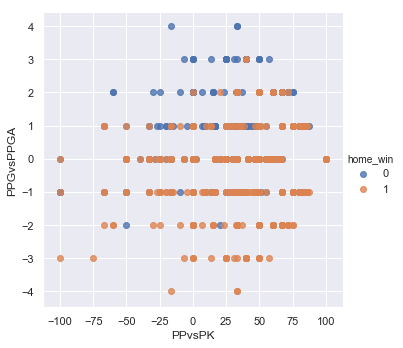

In [6]:
# We will display plots right inside Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

sns.lmplot('PPvsPK', 'PPGvsPPGA', data=season_df, 
           hue='home_win', fit_reg=False);

In [7]:


# converting to numerate types
numheads = ['home_overtime', 'home_goals_for', 'home_shots_for', 'home_goals_against', 
                                        'home_shots_against', 'home_power_play_opportunities', 'home_faceoff_win_pct', 
                                        'away_overtime', 'away_goals_for', 'away_shots_for', 'away_goals_against', 
                                        'away_shots_against', 'away_power_play_goals_for', 'away_power_play_opportunities',
                                        'away_power_play_percent', 'away_power_play_goals_against', 
                                        'away_penalty_kill_percent', 'away_faceoff_win_pct', 'PPvsPK', 'PPGvsPPGA']
season_df = season_df.apply(pd.to_numeric)


candidates = ['home_goals_for', 'home_shots_for', 'home_goals_against', 
                                        'home_shots_against', 'home_power_play_opportunities', 'home_faceoff_win_pct',
              'away_goals_for', 'away_shots_for', 'away_goals_against', 
                                        'away_shots_against', 'away_power_play_goals_for', 'away_power_play_opportunities',
                                        'away_power_play_percent', 'away_power_play_goals_against', 
                                        'away_penalty_kill_percent', 'away_faceoff_win_pct', 'PPvsPK', 'PPGvsPPGA']

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
for idx, feat in enumerate(candidates): 
    ax = axes[int(idx / 4), idx % 4] 
    sns.boxplot(x='home_win', y=feat, data=season_df, ax=ax) 
    ax.set_xlabel('') 
    ax.set_ylabel(feat, fontsize=18) 
fig.tight_layout();

ValueError: ('Unable to parse string "PHI" at position 0', 'occurred at index home_team')

In [17]:
from pandas import read_csv
from matplotlib import pyplot
# # load dataset
# dataset = season_df
# values = dataset.values
# # specify columns to plot
# groups = [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
# i = 1
# # plot each column
# pyplot.figure()
# for group in groups:
# 	pyplot.subplot(len(groups), 1, i)
# 	pyplot.plot(values[:, group])
# 	pyplot.title(dataset.columns[group], y=2, loc='right')
# 	i += 1
# # pyplot.autoscale(enable=True, axis='both', tight=None)
# pyplot.savefig('nigggggs.png', bbox_inches='tight')
# pyplot.show()

# season_df.groupby('home_away').plot(kind='bar', x='game_date')
# pyplot.show()
# season_df.plot(kind='bar', x='game_date')

In [10]:
## balance, scale, and create training data (~80%)
## normalize the batches
# def normalize_with_moments(x, axes=[0, 1], epsilon=1e-8):
#     mean, variance = tf.nn.moments(x, axes=axes)
#     x_normed = (x - mean) / tf.sqrt(variance + epsilon) # epsilon to avoid dividing by zero
#     return x_normed

# def parse_example(line_batch):
#     # ...
#     features = tf.transpose(features)
#     features = normalize_with_moments(features)
#     # ...
# also create out of sampple data (~20%)

In [11]:
# input nodes that take 2x sets of data (one game per node) by format of out of sample data

In [12]:
#  train model 
# careful of the input data overlapping training data 